<a href="https://colab.research.google.com/github/Subi3008/Task1-Iris-data/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset

df=pd.read_csv('/content/train.csv',encoding='latin-1')

In [3]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [5]:
#check for missing values
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [6]:
columns = ['text', 'selected_text']
for column in columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [8]:
x_column = 'sentiment'
y_column = 'Age of User'

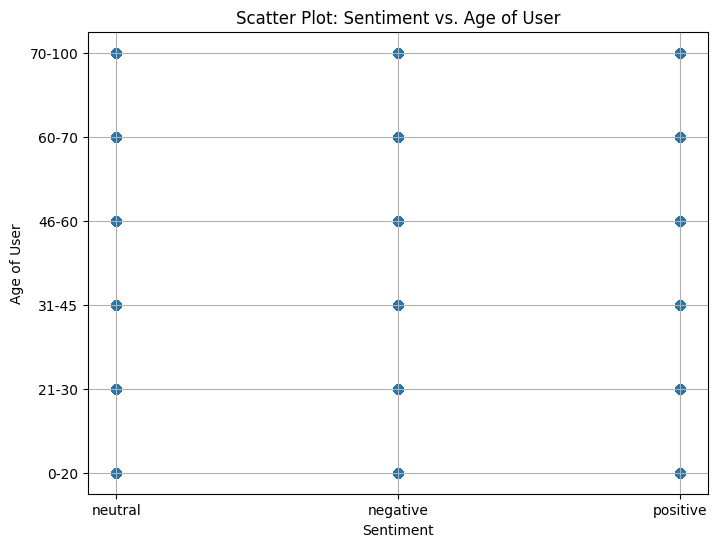

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column], alpha=1)  # Adjust alpha for transparency
plt.title('Scatter Plot: Sentiment vs. Age of User')
plt.xlabel('Sentiment')
plt.ylabel('Age of User')
plt.grid(True)
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')

# Sample text data
text = "Sample text for preprocessing. It includes stopwords and special characters like @#$%."

# Lowercasing
text = text.lower()

# Removing stopwords and handling special characters using NLTK
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_text = [word for word in word_tokens if word not in stop_words and word not in string.punctuation]

# Joining tokens back into text
filtered_text = ' '.join(filtered_text)

# Lemmatization using spaCy
doc = nlp(filtered_text)
lemmatized_text = ' '.join([token.lemma_ for token in doc])

print("Original Text:", text)
print("Preprocessed Text:", lemmatized_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Text: sample text for preprocessing. it includes stopwords and special characters like @#$%.
Preprocessed Text: sample text preprocessing include stopword special character like


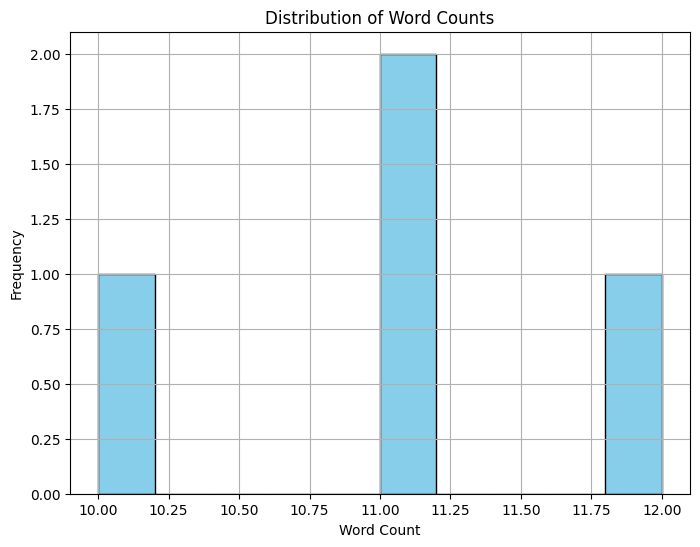

In [11]:
# Sample preprocessed text data
preprocessed_texts = [
   "preprocessing involves cleaning and transforming raw text data into a usable format",
"tokenization splits text into individual words or tokens for analysis",
"lemmatization reduces words to their base form to normalize text data",
"stopwords are common words that are often removed during text preprocessing"
]

# Calculate word counts for each preprocessed text
word_counts = [len(text.split()) for text in preprocessed_texts]

# Create a histogram of word counts
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
# Using Wordembedding
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Tokenize preprocessed texts
tokenized_texts = [simple_preprocess(text) for text in preprocessed_texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=1)

# Get word vectors
word_vectors = [word2vec_model.wv[word] for text in tokenized_texts for word in text]

print(word_vectors)

[array([-8.7241270e-03,  2.1296090e-03, -8.7967870e-04, -9.3158996e-03,
       -9.4243651e-03, -1.4060251e-03,  4.4320417e-03,  3.7115226e-03,
       -6.5007806e-03, -6.8736165e-03, -4.9973032e-03, -2.2846912e-03,
       -7.2513833e-03, -9.5987627e-03, -2.7423985e-03, -8.3623864e-03,
       -6.0360082e-03, -5.6711482e-03, -2.3493727e-03, -1.7140590e-03,
       -8.9585911e-03, -7.4033870e-04,  8.1525883e-03,  7.6937410e-03,
       -7.2051310e-03, -3.6677679e-03,  3.1203981e-03, -9.5685022e-03,
        1.4759279e-03,  6.5238085e-03,  5.7515660e-03, -8.7718181e-03,
       -4.5136837e-03, -8.1428420e-03,  5.1530042e-05,  9.2571080e-03,
        5.9728064e-03,  5.0707911e-03,  5.0658700e-03, -3.2411164e-03,
        9.5499530e-03, -7.3590986e-03, -7.2774938e-03, -2.2616806e-03,
       -7.8190572e-04, -3.2242865e-03, -5.9454842e-04,  7.4860174e-03,
       -6.9632585e-04, -1.6169645e-03,  2.7435087e-03, -8.3682230e-03,
        7.8491662e-03,  8.5400837e-03, -9.5816068e-03,  2.4436372e-03,
     

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

unique_sentiments = df['sentiment'].unique()
print("Unique Sentiments:", unique_sentiments)

# Encode the categorical labels ('sentiment') into numerical format
df['sentiment_encoded'], _ = pd.factorize(df['sentiment'])

# Split the dataset into features (text data) and labels (sentiment labels)
X = df['text']  # Features (text data)
y = df['sentiment_encoded']  # Labels (sentiment labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Unique Sentiments: ['neutral' 'negative' 'positive']


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Vectorize text data (if necessary)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, nb_predictions)
precision = precision_score(y_test, nb_predictions, average='weighted')
recall = recall_score(y_test, nb_predictions, average='weighted')
f1 = f1_score(y_test, nb_predictions, average='weighted')

print("Naive Bayes Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Naive Bayes Classifier Metrics:
Accuracy: 0.6137893396398035
Precision: 0.6877104193659561
Recall: 0.6137893396398035
F1 Score: 0.5992129798604205


In [15]:
from sklearn.svm import SVC

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions, average='weighted')
recall = recall_score(y_test, svm_predictions, average='weighted')
f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

SVM Classifier Metrics:
Accuracy: 0.7118428233581954
Precision: 0.723359062359458
Recall: 0.7118428233581954
F1 Score: 0.7120190456005105


In [16]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (27481,)
Shape of y: (27481,)


In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Ensure X and y have the same number of samples
assert X.shape[0] == y.shape[0], "Number of samples in X and y are inconsistent"

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1)

# Define k-fold cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.69797589 0.69138049 0.70593587 0.69683875 0.6899454 ]
Mean Accuracy: 0.6964152806643126


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


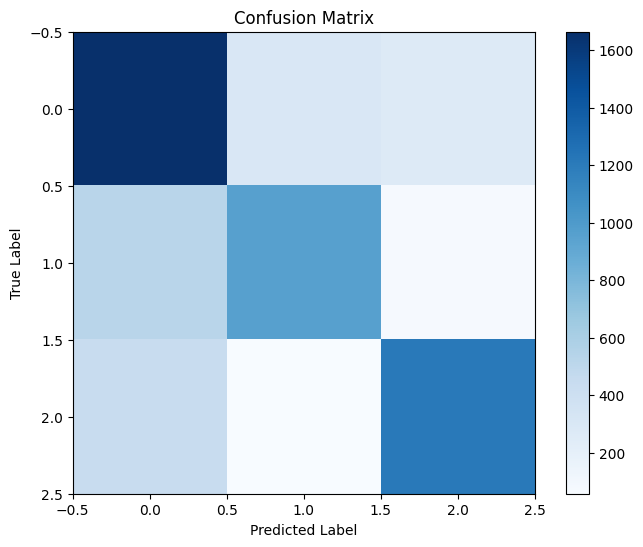

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69      2230
           1       0.73      0.61      0.67      1562
           2       0.78      0.71      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print('Classification Report:')
print(class_report)

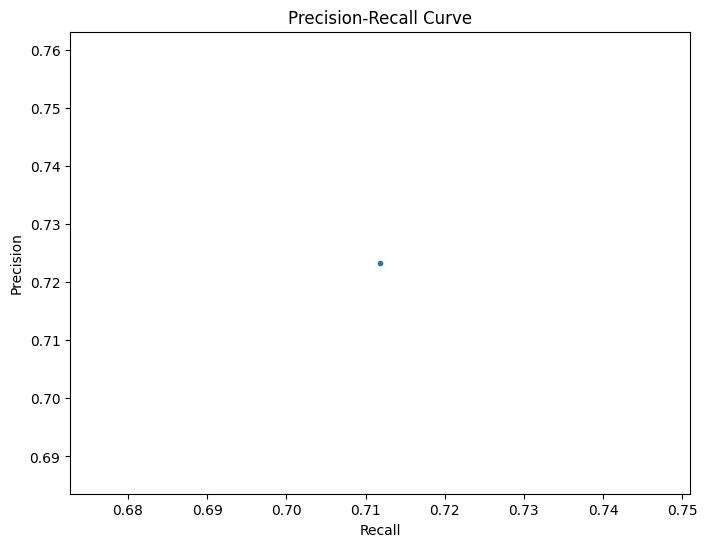

In [21]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()